In [302]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

### Importing marketing data

In [303]:
marketingdf = pd.read_csv('Marketing Data.csv')
marketingdf.head()

,Date,Marketing Spend,Promo
0,09/11/2020,651.375,No Promo
1,10/11/2020,1298.250,Promotion Red
2,11/11/2020,1559.375,Promotion Blue
3,12/11/2020,1801.750,No Promo
4,13/11/2020,2614.500,No Promo


### importing revenue1 data

In [304]:
revenue1 = pd.read_csv('Revenue Data 1.csv')
revenue1.head()

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
0,09/11/2020,34.0,11.0,11.0,2020,Monday,465.0
1,10/11/2020,34.0,11.0,11.0,2020,Tuesday,10386.0
2,11/11/2020,34.0,11.0,11.0,2020,Wednesday,12475.0
3,12/11/2020,34.0,11.0,11.0,2020,Thursday,11712.0
4,13/11/2020,34.0,11.0,11.0,2020,Friday,10000.0


### importing revenue2 data

In [305]:
revenue2 = pd.read_csv('Revenue Data 2.csv')
revenue2.head()

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
0,18/03/2021,53.0,3.0,15.0,2021.0,Thursday,14909.0
1,19/03/2021,53.0,3.0,15.0,2021.0,Friday,5903.0
2,20/03/2021,53.0,3.0,15.0,2021.0,Saturday,4169.0
3,21/03/2021,54.0,3.0,15.0,2021.0,Sunday,9486.0
4,22/03/2021,54.0,3.0,15.0,2021.0,Monday,9209.0


### importing visitors data

In [306]:
visitors = pd.read_excel('Visitors Data.xlsx')
visitors.head()

,Date,Visitors
0,2020-11-09,707.0
1,2020-11-10,1455.0
2,2020-11-11,1520.0
3,2020-11-12,1726.0
4,2020-11-13,2134.0


### Checking data type and change if needed

In [307]:
#check the date type columns. Column needs to be transformed into datetime to allow merging the tables together

print(marketingdf.dtypes)
print(revenue1.dtypes)
print(revenue2.dtypes)
print(visitors.dtypes)

Date                object
Marketing Spend    float64
Promo               object
dtype: object
Date             object
Week_ID         float64
Month Number    float64
Month_ID        float64
Year              int64
Day_Name         object
Revenue         float64
dtype: object
Date             object
Week_ID         float64
Month Number    float64
Month_ID        float64
Year            float64
Day_Name         object
Revenue         float64
dtype: object
Date        datetime64[ns]
Visitors           float64
dtype: object


In [308]:
#marketing,revenue1,revenue2 date column is an object. The function below will ease the type transoframtion to datetime
#all the data set have the same format of date d/m/Y
def date(df,column):
    df[column] = pd.to_datetime(df[column], format='%d/%m/%Y' )
    return df

In [309]:
marketingdf = date(marketingdf,'Date')
revenue1 = date(revenue1,'Date')
revenue2 = date(revenue2,'Date')

In [310]:
#checking the types again
print(marketingdf.dtypes)
print(revenue1.dtypes)
print(revenue2.dtypes)

Date               datetime64[ns]
Marketing Spend           float64
Promo                      object
dtype: object
Date            datetime64[ns]
Week_ID                float64
Month Number           float64
Month_ID               float64
Year                     int64
Day_Name                object
Revenue                float64
dtype: object
Date            datetime64[ns]
Week_ID                float64
Month Number           float64
Month_ID               float64
Year                   float64
Day_Name                object
Revenue                float64
dtype: object


### Connecting datasets

In [311]:
#checking if all the dates are unique to connect the data set on them
def unique_date(df):
    all_unique = len(df['Date']) == df['Date'].nunique()

    if all_unique:
        print(f"All dates are unique")
    else:
        print(f"Not all dates are unique")

In [312]:
unique_date(marketingdf)
unique_date(revenue1)
unique_date(revenue2)
unique_date(visitors)

All dates are unique
All dates are unique
All dates are unique
All dates are unique


In [313]:
#connecting the dataset revenue1 and revenue2
complete_revenue = pd.concat([revenue1, revenue2], axis=0)
#Sorting the by date 
complete_revenue.sort_values(by="Date", ascending=True, inplace=True)
complete_revenue

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
0,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0
1,2020-11-10,34.0,11.0,11.0,2020.0,Tuesday,10386.0
2,2020-11-11,34.0,11.0,11.0,2020.0,Wednesday,12475.0
3,2020-11-12,34.0,11.0,11.0,2020.0,Thursday,11712.0
4,2020-11-13,34.0,11.0,11.0,2020.0,Friday,10000.0
...,...,...,...,...,...,...,...
51,2021-05-08,60.0,5.0,17.0,2021.0,Saturday,5927.0
52,2021-05-09,61.0,5.0,17.0,2021.0,Sunday,3861.0
53,2021-05-10,NaN,NaN,NaN,NaN,NaN,NaN
54,2021-05-11,NaN,NaN,NaN,NaN,NaN,NaN


In [314]:
#merging revenue with marketing data and visitors data
#merging revenue with marketing data and visitors data#Setting the date as index prior to merging
marketingdf.set_index("Date", inplace=True)
complete_revenue.set_index("Date", inplace=True)
visitors.set_index("Date", inplace=True)

In [315]:
full_df = pd.concat([marketingdf, complete_revenue, visitors], axis=1)
#sorting the values
full_df.sort_values(by="Date", ascending=True, inplace=True)
full_df

,Marketing Spend,Promo,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Visitors
Date,,,,,,,,,
2020-11-09,651.375,No Promo,34.0,11.0,11.0,2020.0,Monday,465.0,707.0
2020-11-10,1298.250,Promotion Red,34.0,11.0,11.0,2020.0,Tuesday,10386.0,1455.0
2020-11-11,1559.375,Promotion Blue,34.0,11.0,11.0,2020.0,Wednesday,12475.0,1520.0
2020-11-12,1801.750,No Promo,34.0,11.0,11.0,2020.0,Thursday,11712.0,1726.0
2020-11-13,2614.500,No Promo,34.0,11.0,11.0,2020.0,Friday,10000.0,2134.0
...,...,...,...,...,...,...,...,...,...
2021-05-08,1121.875,No Promo,60.0,5.0,17.0,2021.0,Saturday,5927.0,1483.0
2021-05-09,871.000,No Promo,61.0,5.0,17.0,2021.0,Sunday,3861.0,1303.0
2021-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data cleaning and preprocessing


In [316]:
#already from the full_df we can see the last three rows are all na we will first delete these rows
full_df = full_df[:-3]
full_df

,Marketing Spend,Promo,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Visitors
Date,,,,,,,,,
2020-11-09,651.375000,No Promo,34.0,11.0,11.0,2020.0,Monday,465.0,707.0
2020-11-10,1298.250000,Promotion Red,34.0,11.0,11.0,2020.0,Tuesday,10386.0,1455.0
2020-11-11,1559.375000,Promotion Blue,34.0,11.0,11.0,2020.0,Wednesday,12475.0,1520.0
2020-11-12,1801.750000,No Promo,34.0,11.0,11.0,2020.0,Thursday,11712.0,1726.0
2020-11-13,2614.500000,No Promo,34.0,11.0,11.0,2020.0,Friday,10000.0,2134.0
...,...,...,...,...,...,...,...,...,...
2021-05-05,1119.600000,No Promo,60.0,5.0,17.0,2021.0,Wednesday,7284.0,1400.0
2021-05-06,2067.888889,Promotion Red,60.0,5.0,17.0,2021.0,Thursday,13021.0,2244.0
2021-05-07,NaN,No Promo,60.0,5.0,17.0,2021.0,Friday,4587.0,2023.0


In [317]:
#checking for duplicates and checking if the date appears more than once in any place
duplicate_indexes = full_df.index[full_df.index.duplicated(keep=False)]
duplicate_rows = full_df[full_df.index.isin(duplicate_indexes)]
duplicate_rows.sort_values(by='Date', ascending=True)
print(duplicate_rows)



            Marketing Spend          Promo  Week_ID  Month Number  Month_ID  \
Date                                                                          
2021-03-18      1490.900000  Promotion Red      NaN           NaN       NaN   
2021-03-18      1490.900000  Promotion Red     53.0           3.0      15.0   
2021-03-19       590.300000  Promotion Red     53.0           3.0      15.0   
2021-03-19       590.300000  Promotion Red      NaN           NaN       NaN   
2021-03-20       521.125000  Promotion Red      NaN           NaN       NaN   
2021-03-20       521.125000  Promotion Red     53.0           3.0      15.0   
2021-03-21       862.363636  Promotion Red      NaN           NaN       NaN   
2021-03-21       862.363636  Promotion Red     54.0           3.0      15.0   

              Year  Day_Name  Revenue  Visitors  
Date                                             
2021-03-18  2021.0       NaN      NaN    1923.0  
2021-03-18  2021.0  Thursday  14909.0    1923.0  
2021-03-1

In [318]:
# four dates are repeated in the Date column where 4 of them are values with na and the other 4 are fully filled correct rows
# we will drop duplicates with the na 
duplicate_na_rows = full_df[full_df.index.isin(duplicate_indexes) & full_df.isna().any(axis=1)]
print(duplicate_na_rows)
full_df = full_df.drop(duplicate_na_rows.index)

            Marketing Spend          Promo  Week_ID  Month Number  Month_ID  \
Date                                                                          
2021-03-18      1490.900000  Promotion Red      NaN           NaN       NaN   
2021-03-19       590.300000  Promotion Red      NaN           NaN       NaN   
2021-03-20       521.125000  Promotion Red      NaN           NaN       NaN   
2021-03-21       862.363636  Promotion Red      NaN           NaN       NaN   

              Year Day_Name  Revenue  Visitors  
Date                                            
2021-03-18  2021.0      NaN      NaN    1923.0  
2021-03-19  2021.0      NaN      NaN     685.0  
2021-03-20  2021.0      NaN      NaN     543.0  
2021-03-21  2021.0      NaN      NaN    1472.0  


In [319]:
full_df[full_df.index.isin(duplicate_indexes)]

,Marketing Spend,Promo,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Visitors
Date,,,,,,,,,


In [320]:
#checking for other na values in the dataset
full_df[full_df.isna().any(axis=1)]

,Marketing Spend,Promo,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Visitors
Date,,,,,,,,,
2020-11-18,906.700000,No Promo,35.0,11.0,11.0,2020.0,Wednesday,7441.0,NaN
2020-11-23,4284.750000,Promotion Blue,36.0,11.0,11.0,2020.0,Monday,NaN,2632.0
2020-11-27,NaN,Promotion Red,36.0,11.0,11.0,2020.0,Friday,14760.0,1671.0
2020-12-02,1425.400000,Promotion Red,37.0,12.0,12.0,2020.0,Wednesday,12154.0,NaN
2020-12-07,961.200000,Promotion Red,38.0,12.0,12.0,2020.0,Monday,NaN,1584.0
2020-12-13,NaN,Promotion Blue,39.0,12.0,12.0,2020.0,Sunday,8802.0,1163.0
2020-12-26,4535.375000,Promotion Blue,40.0,12.0,12.0,2020.0,Saturday,36283.0,NaN
2021-01-28,1425.777778,No Promo,46.0,1.0,13.0,2021.0,Thursday,11156.0,NaN
2021-02-22,837.100000,No Promo,50.0,2.0,14.0,2021.0,Monday,NaN,1428.0


In [321]:
# we will fill the marketing spend depending on the average of the spend per promotion
def promotion_na(df,promotion):
    market_promotion = df[df['Promo'] == promotion]
    avg_promotion = round(market_promotion['Marketing Spend'].mean(),6)
    df.loc[(df['Promo'] == promotion)&df['Marketing Spend'].isna(),'Marketing Spend']=avg_promotion
    return df
    

In [322]:
full_df = promotion_na(full_df,'Promotion Red')
full_df = promotion_na(full_df,'Promotion Blue')
full_df = promotion_na(full_df,'No Promo')

In [323]:
full_df['Marketing Spend'].isna().sum()

0

In [324]:
#Using forward fill for the Revenue and Visitors as the average might make more assumption on the data
def ff_fill(df,column):
    df[column] = df[column].fillna(method='ffill')
    return df
   

In [325]:
full_df = ff_fill(full_df,'Revenue')
full_df = ff_fill(full_df,'Visitors')

In [326]:
full_df.isna().sum()

Marketing Spend    0
Promo              0
Week_ID            0
Month Number       0
Month_ID           0
Year               0
Day_Name           0
Revenue            0
Visitors           0
dtype: int64

In [327]:
#checking for unique values
for column in full_df:
    unique_value = np.unique(full_df[column])
    nb_values = len(unique_value)
    if nb_values < 15:
        print(f'Number of unique values for {column} is {nb_values} - {unique_value}')
    else:
        print(f'Number of unqiue values for {column} is {nb_values} ')
    

Number of unqiue values for Marketing Spend is 177 
Number of unique values for Promo is 3 - ['No Promo' 'Promotion Blue' 'Promotion Red']
Number of unqiue values for Week_ID is 28 
Number of unique values for Month Number is 7 - [ 1.  2.  3.  4.  5. 11. 12.]
Number of unique values for Month_ID is 7 - [11. 12. 13. 14. 15. 16. 17.]
Number of unique values for Year is 2 - [2020. 2021.]
Number of unique values for Day_Name is 7 - ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
Number of unqiue values for Revenue is 173 
Number of unqiue values for Visitors is 166 


In [328]:
#Rounding marketing Spend to 2 decimal places and the rest to an INT
full_df['Marketing Spend'] = full_df['Marketing Spend'].round(2)

In [329]:
full_df

,Marketing Spend,Promo,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Visitors
Date,,,,,,,,,
2020-11-09,651.38,No Promo,34.0,11.0,11.0,2020.0,Monday,465.0,707.0
2020-11-10,1298.25,Promotion Red,34.0,11.0,11.0,2020.0,Tuesday,10386.0,1455.0
2020-11-11,1559.38,Promotion Blue,34.0,11.0,11.0,2020.0,Wednesday,12475.0,1520.0
2020-11-12,1801.75,No Promo,34.0,11.0,11.0,2020.0,Thursday,11712.0,1726.0
2020-11-13,2614.50,No Promo,34.0,11.0,11.0,2020.0,Friday,10000.0,2134.0
...,...,...,...,...,...,...,...,...,...
2021-05-05,1119.60,No Promo,60.0,5.0,17.0,2021.0,Wednesday,7284.0,1400.0
2021-05-06,2067.89,Promotion Red,60.0,5.0,17.0,2021.0,Thursday,13021.0,2244.0
2021-05-07,1172.92,No Promo,60.0,5.0,17.0,2021.0,Friday,4587.0,2023.0


In [330]:
columns_to_convert = ['Week_ID','Month Number','Month_ID','Year','Revenue','Visitors']
full_df[columns_to_convert] = full_df[columns_to_convert].round(0).astype('Int64')

In [331]:
# we don't neeed the Week_ID and Month_Id for the analysis thus they will be deleted
columns_to_delete = ['Week_ID','Month_ID','Year','Month Number']
full_df.drop(columns=columns_to_delete, axis=1, inplace=True)

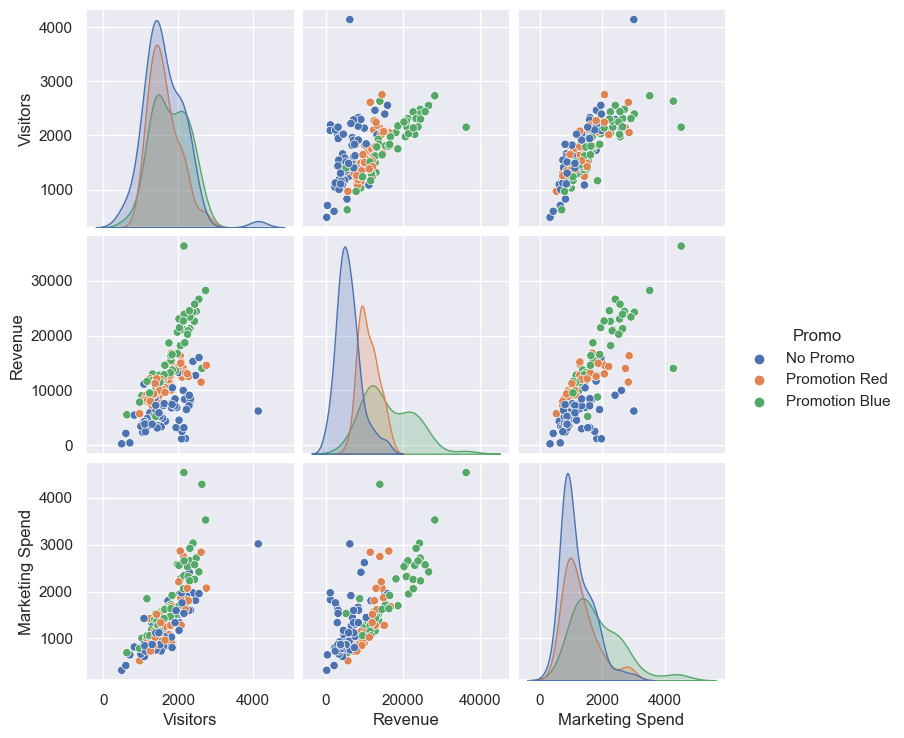

In [332]:
sns.pairplot(full_df[['Visitors', 'Revenue', 'Marketing Spend', 'Promo']], hue = 'Promo')
plt.show()

In [333]:
full_df

,Marketing Spend,Promo,Day_Name,Revenue,Visitors
Date,,,,,
2020-11-09,651.38,No Promo,Monday,465,707
2020-11-10,1298.25,Promotion Red,Tuesday,10386,1455
2020-11-11,1559.38,Promotion Blue,Wednesday,12475,1520
2020-11-12,1801.75,No Promo,Thursday,11712,1726
2020-11-13,2614.50,No Promo,Friday,10000,2134
...,...,...,...,...,...
2021-05-05,1119.60,No Promo,Wednesday,7284,1400
2021-05-06,2067.89,Promotion Red,Thursday,13021,2244
2021-05-07,1172.92,No Promo,Friday,4587,2023


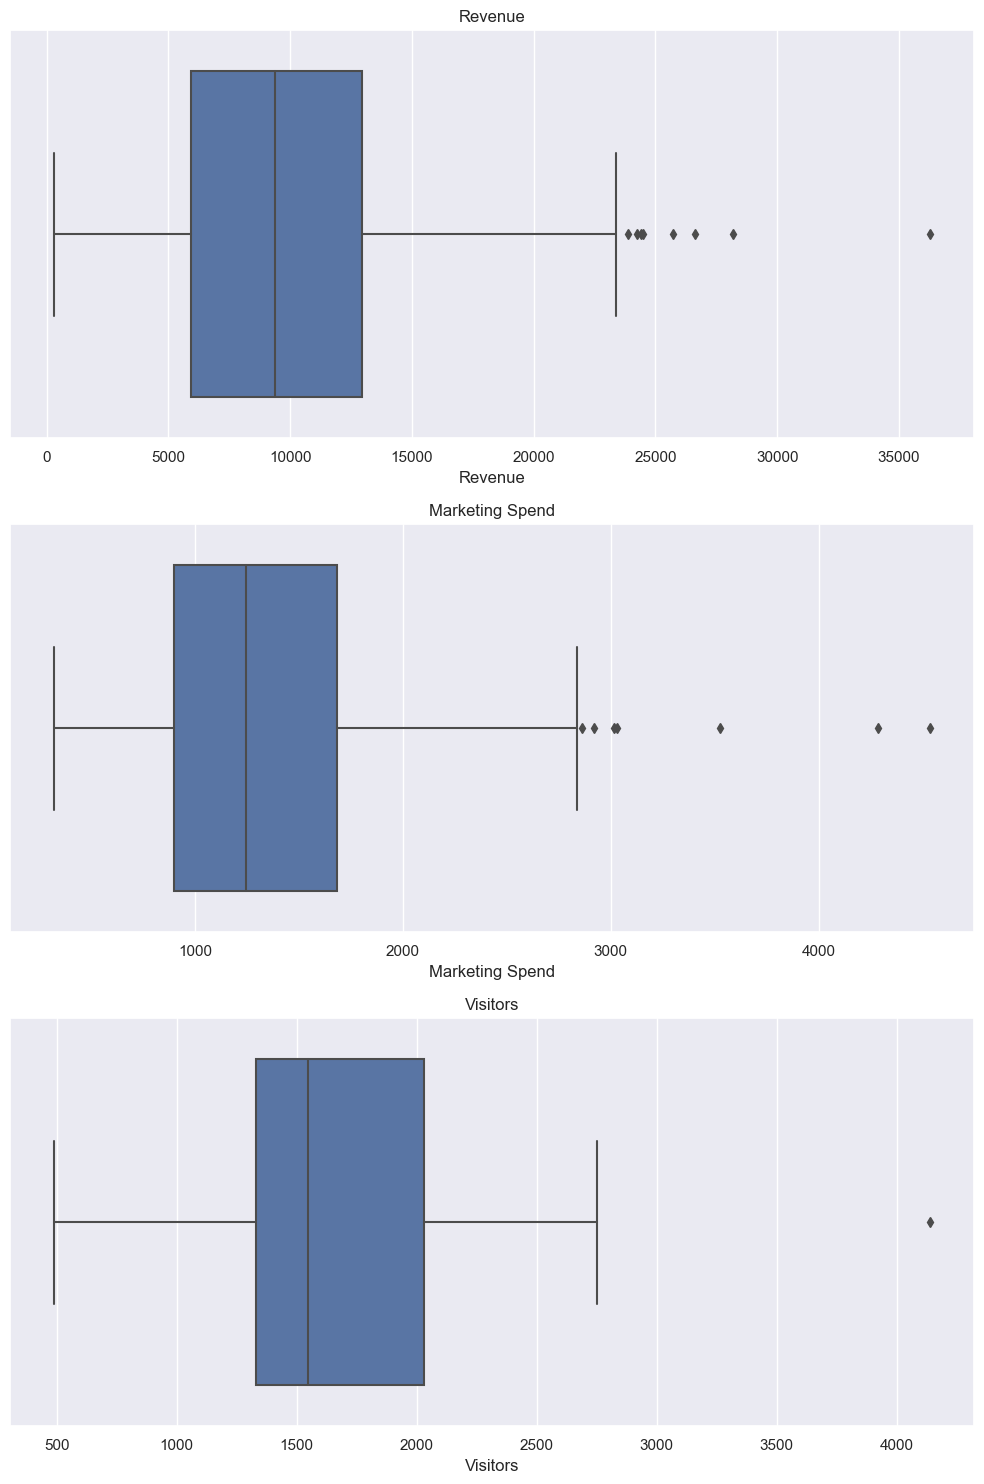

In [334]:
#Checking the data for possible outliers
full_df.describe()

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plotting boxplots for each column
sns.boxplot(x=full_df['Revenue'], ax=axes[0])
axes[0].set_title('Revenue')

sns.boxplot(x=full_df['Marketing Spend'], ax=axes[1])
axes[1].set_title('Marketing Spend')

sns.boxplot(x=full_df['Visitors'], ax=axes[2])
axes[2].set_title('Visitors')

plt.tight_layout()
plt.show()

# Seems like all thre columns have outliers, revenue values over 35000, Marketing over 3500 and Visitors over 4000

In [335]:
#removing the outliers
full_df = full_df[full_df['Revenue']<35000] 
full_df = full_df[full_df['Marketing Spend']<3500]
full_df = full_df[full_df['Visitors'] < 4000]

In [336]:
full_df

,Marketing Spend,Promo,Day_Name,Revenue,Visitors
Date,,,,,
2020-11-09,651.38,No Promo,Monday,465,707
2020-11-10,1298.25,Promotion Red,Tuesday,10386,1455
2020-11-11,1559.38,Promotion Blue,Wednesday,12475,1520
2020-11-12,1801.75,No Promo,Thursday,11712,1726
2020-11-13,2614.50,No Promo,Friday,10000,2134
...,...,...,...,...,...
2021-05-05,1119.60,No Promo,Wednesday,7284,1400
2021-05-06,2067.89,Promotion Red,Thursday,13021,2244
2021-05-07,1172.92,No Promo,Friday,4587,2023


### Checking the  data distribution

In [337]:
#checking the distrubution through histograms

## do the check for narmilty from theiss

def distribution(df,column):
    sns.set(rc={'figure.figsize':(6,4)})
    x=df[column].values
    sns.histplot(x,color='blue',kde=True)
    mean = df[column].mean()
    plt.axvline(mean,0,1,color='red')
    plt.show()


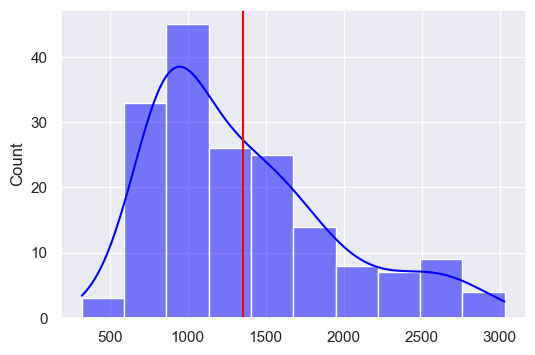

In [338]:
distribution(full_df,'Marketing Spend') # Distribution looks good a bit right skewed 

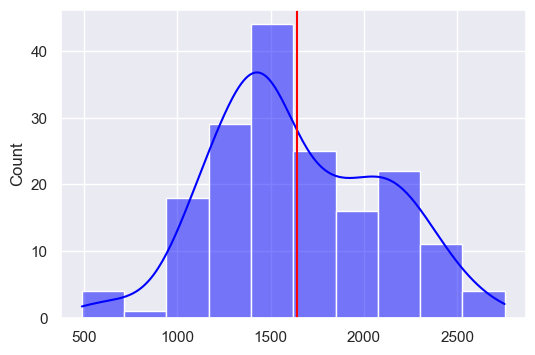

In [339]:
distribution(full_df,'Visitors') # good distribution

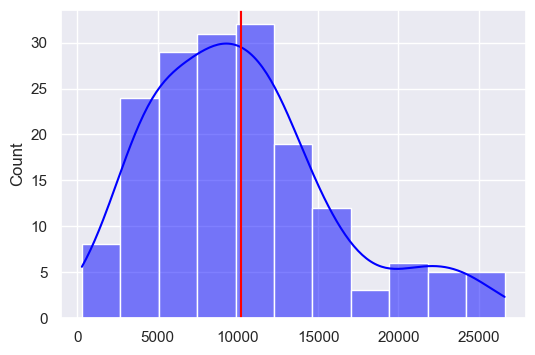

In [340]:
distribution(full_df,'Revenue') # good distribution right skewed

### Investiagte the relationship between the variables PRESENT FINDINGS

In [341]:
# checking the relationship using spearmans correlation, it is less sensitive to outliers and does not assume the linear relationship
from scipy.stats import spearmanr

In [342]:
full_df

,Marketing Spend,Promo,Day_Name,Revenue,Visitors
Date,,,,,
2020-11-09,651.38,No Promo,Monday,465,707
2020-11-10,1298.25,Promotion Red,Tuesday,10386,1455
2020-11-11,1559.38,Promotion Blue,Wednesday,12475,1520
2020-11-12,1801.75,No Promo,Thursday,11712,1726
2020-11-13,2614.50,No Promo,Friday,10000,2134
...,...,...,...,...,...
2021-05-05,1119.60,No Promo,Wednesday,7284,1400
2021-05-06,2067.89,Promotion Red,Thursday,13021,2244
2021-05-07,1172.92,No Promo,Friday,4587,2023


In [343]:
# we can create a hypothesis test. H_0 assumes that these two variables are independent and H_1 is
# that these two variables are dependent. Set significance level to 0.05

In [344]:
# to check the relationship with Promo value we need to change the categorical values into numerical
from sklearn.preprocessing import LabelEncoder
def cat_to_num(df,column):
    le=LabelEncoder()
    new_column_name = f'{column}_num'
    df[new_column_name] = le.fit_transform(df[column]) + 1
    return df


In [345]:
full_df = cat_to_num(full_df,'Day_Name')
full_df = cat_to_num(full_df,'Promo')

In [346]:
def spearmans_corr(df,column1,column2):
    statistics, pvalue = spearmanr(df[column1], df[column2])
    print(statistics, pvalue) # the variable are dependent and have quite strong relationship

    plt.figure()
    plt.plot(df[column1], df[column2], 'o', color='purple')
    plt.show() 

0.8061936127716105 4.689822994988576e-41


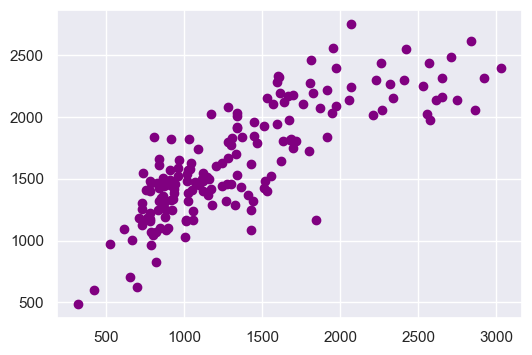

In [347]:
spearmans_corr(full_df,'Marketing Spend','Visitors')
# the variable are strongly dependent and have a strong relationship

0.6937597703810642 2.6441998219581735e-26


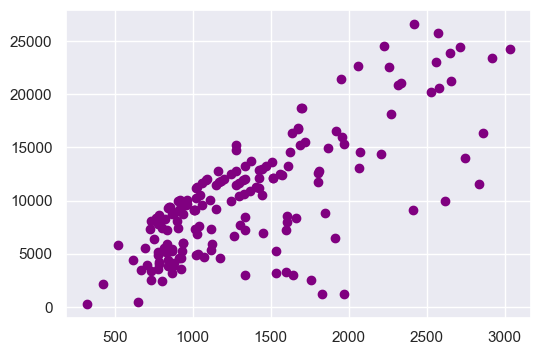

In [348]:
spearmans_corr(full_df,'Marketing Spend','Revenue')
# the variable are dependent and have a moderate relationship

0.1581224910829563 0.037171690697829704


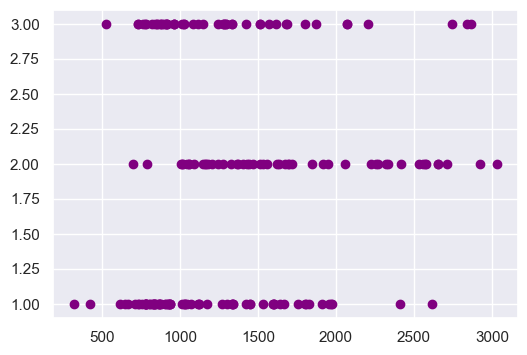

In [349]:
spearmans_corr(full_df,'Marketing Spend','Promo_num')
# the variables have some dependencies but their relationship is week


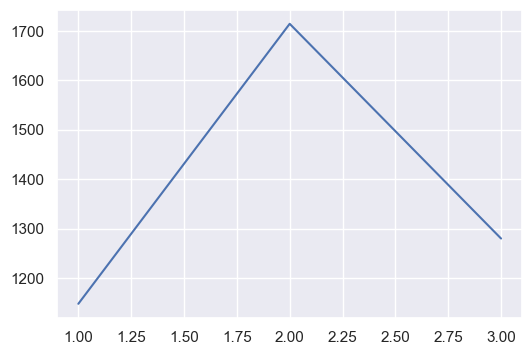

In [350]:
avg_promo_mar = full_df.groupby('Promo_num')['Marketing Spend'].mean()
avg_promo_mar
plt.plot(avg_promo_mar)
plt.show()

#promotion blue affects the marketing spend the most

0.5256316435445129 9.53182928002568e-14


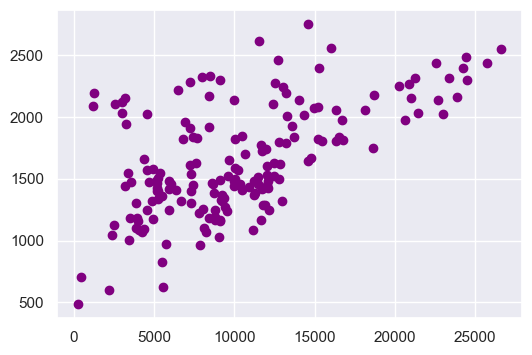

In [351]:
spearmans_corr(full_df,'Revenue','Visitors')
#the variables are dependent and have a moderate to low relationship

0.579156382276314 5.686976225250696e-17


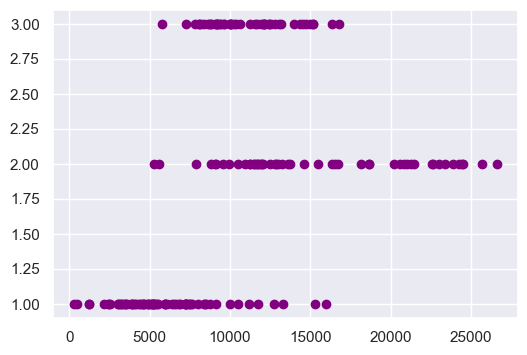

In [352]:
spearmans_corr(full_df,'Revenue','Promo_num')
# the variable are depndent and have quite strong relationship


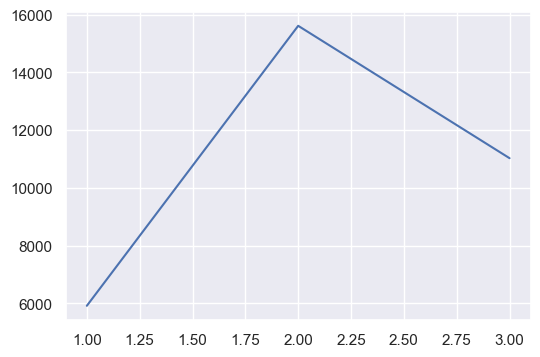

In [353]:
avg_promo_rev = full_df.groupby('Promo_num')['Revenue'].mean()
avg_promo_rev
plt.plot(avg_promo_rev)
plt.show()

#promotion blue affects the revevenue the most, however promo red also has moderate impact on the revenue

0.034689740291539595 0.6495210028736893


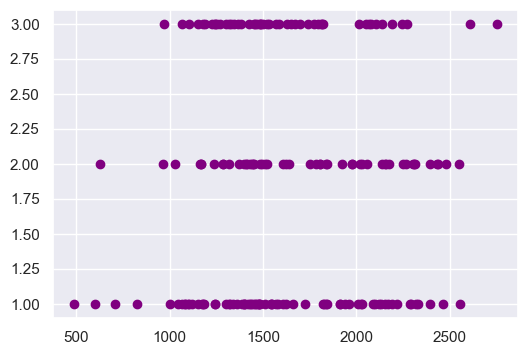

In [354]:
spearmans_corr(full_df,'Visitors','Promo_num')
# from the p value and statistics it seems there is no correlation but the points are slightly moving to the right.
# we will look at the averages 

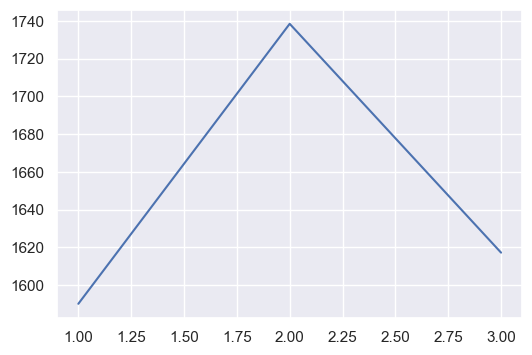

In [355]:
avg_promo_vis = full_df.groupby('Promo_num')['Visitors'].mean()
avg_promo_vis
plt.plot(avg_promo_vis)
plt.show()
# it looks like promotion blue affects the visitors the most out of the three, promo red affects visitors a bit more than no promo

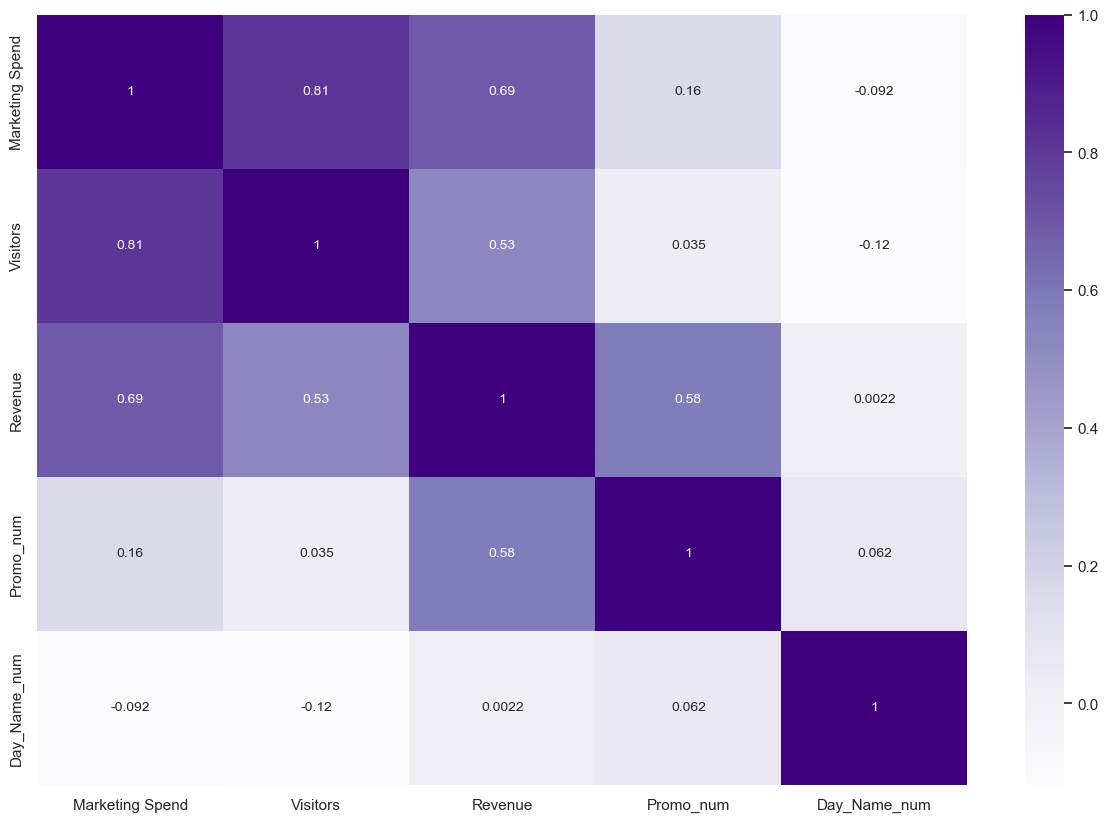

In [356]:
sns.set(rc={'figure.figsize':(15,10)})
n_variables =['Marketing Spend','Visitors','Revenue','Promo_num','Day_Name_num']

pc = full_df[n_variables].corr(method='spearman')

cols = n_variables

ax = sns.heatmap(pc, annot =True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap='Purples')
plt.show()

In [357]:
#FINDINGS

# Revenue and Visitors are most affected by Marketing Spend
# Fromt the previous visualisations it can be noticed that different promotions affect the variables differently. 
# However Promotion Blue affects Revenue, Visitors and Marketing Spend the most

### Which variable affects Revenue the most?

In [358]:
#we can check that firslty looking at heatmap from cell above using the heatmap 

#Revenue is the most affected by the Marketing Spend

In [359]:
full_df

,Marketing Spend,Promo,Day_Name,Revenue,Visitors,Day_Name_num,Promo_num
Date,,,,,,,
2020-11-09,651.38,No Promo,Monday,465,707,2,1
2020-11-10,1298.25,Promotion Red,Tuesday,10386,1455,6,3
2020-11-11,1559.38,Promotion Blue,Wednesday,12475,1520,7,2
2020-11-12,1801.75,No Promo,Thursday,11712,1726,5,1
2020-11-13,2614.50,No Promo,Friday,10000,2134,1,1
...,...,...,...,...,...,...,...
2021-05-05,1119.60,No Promo,Wednesday,7284,1400,7,1
2021-05-06,2067.89,Promotion Red,Thursday,13021,2244,5,3
2021-05-07,1172.92,No Promo,Friday,4587,2023,1,1


In [360]:
# we will perform feature importance to see which variable affect the revenue the most
#first we will create a dataset with just numerical values
col_to_keep = ['Marketing Spend','Revenue','Visitors','Promo_num','Day_Name_num']
num_df = full_df[col_to_keep]

In [361]:
#we split the data into x and y
X = num_df.drop(['Revenue'], axis = 1).values
x_columns = num_df.drop(['Revenue'],axis=1)
y = num_df['Revenue'].astype(int)


In [362]:
# run a Random Forest to see the feature importance
#We are using Regressor as Revenue is a continious variable not categorical

dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X, y)

# Feature importances
feature_importances = dt_regressor.feature_importances_

# Print feature importances
for i, column in enumerate((num_df.drop(['Revenue'], axis = 1)).columns):
    print(f'The feature importance for {column} is {feature_importances[i]}')

# Just like the correlation from heatmap the Marketing Spend affects the revenue the most


The feature importance for Marketing Spend is 0.510982558239622
The feature importance for Visitors is 0.14034871876456212
The feature importance for Promo_num is 0.33430030733145066
The feature importance for Day_Name_num is 0.014368415664365227


### Which campaign was the most successful in terms of revenue and why?

In [363]:
promo_revenue = full_df.groupby('Promo')['Revenue'].sum()
max_revenue = promo_revenue.max()
most_succ_promo = promo_revenue.idxmax()
print(f'The most successful promotion campaign was {most_succ_promo} with the revenue of {max_revenue}')

The most successful promotion campaign was Promotion Blue with the revenue of 796367


In [364]:
# to continue the analysis of the best promotion let's also check which promotion cost the company the most
promo_cost = full_df.groupby('Promo')['Marketing Spend'].sum()
print(promo_cost)
max_cost = promo_cost.max()
most_cost_promo = promo_cost.idxmax()
print(f'The most costly promotion campaign was {most_cost_promo} with the cost of {max_cost}')

# The company spend the most amount of money on Promotion Blue which could be one of the reasons of the max revenue

Promo
No Promo          83781.27
Promotion Blue    87428.31
Promotion Red     63989.11
Name: Marketing Spend, dtype: float64
The most costly promotion campaign was Promotion Blue with the cost of 87428.31


In [365]:
# promotion blue might be more effective but how much is the profit vs the profit from the other promotions
# check the percentages and absolute values 
# we spend this much on promotin blue this is the revenue this is the profit check the profits and which one brought higher one

In [366]:
def profit(df,promo_type):
    promotion = df[df['Promo'] == promo_type]
    promo_rev = promotion['Revenue'].sum()
    promo_mar = promotion['Marketing Spend'].sum()
    profit = promo_rev - promo_mar
    return profit

In [367]:
profit_blue = profit(full_df,'Promotion Blue')
profit_red = profit(full_df,'Promotion Red')
profit_no_promo = profit(full_df,'No Promo')

In [368]:
#checking the percentages of profit from the total profit
total_rev = full_df['Revenue'].sum()
total_mar = full_df['Marketing Spend'].sum()
full_profit = total_rev - total_mar

In [369]:
def perc_profit(promo_profit,total_profit,promo):
    percentage_profit = (promo_profit / total_profit) * 100

    return print(f"The profit of {promo} is {percentage_profit:.2f}% of the total profit.")

In [370]:
perc_profit(profit_blue,full_profit,'Promotion Blue')
perc_profit(profit_red,full_profit,'Promotion Red')
perc_profit(profit_no_promo, full_profit, 'No Promotion')

# Promotion Blue is also the most profitable for the company so they should contonue investing more into the marketing of Promo Blue

The profit of Promotion Blue is 45.92% of the total profit.
The profit of Promotion Red is 31.56% of the total profit.
The profit of No Promotion is 22.52% of the total profit.


In [371]:
# we will check the same but with visitors
promo_visitors = full_df.groupby('Promo')['Visitors'].sum()
print(promo_visitors)
max_visitors = promo_visitors.max()
most_visitors_promo = promo_visitors.idxmax()
print(f'The promo campaign which brought the most number of customers is {most_visitors_promo} with{max_visitors} visitors')
#No promotion brought the most visitors

Promo
No Promo          116069
Promotion Blue     88667
Promotion Red      80857
Name: Visitors, dtype: Int64
The promo campaign which brought the most number of customers is No Promo with116069 visitors


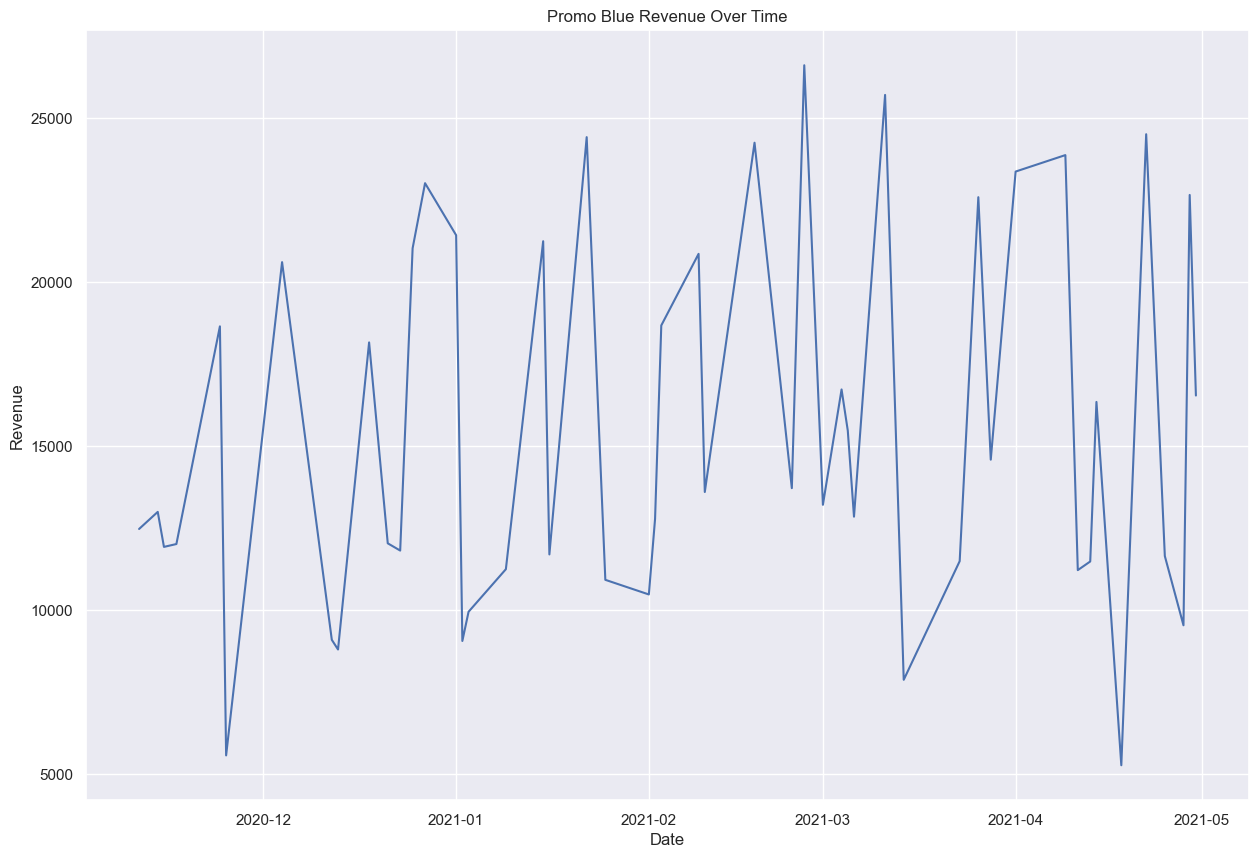

In [372]:
# we will also look at the Promotion Blue throughout the time
promo_blue = full_df[full_df['Promo'] == 'Promotion Blue']
plt.plot(promo_blue.index, promo_blue['Revenue'])
plt.title('Promo Blue Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()


### Prediction 1

In [373]:
# How much revenue shall we expect if the day is Friday, 
# we estimate to have 8,000 visitors, we estimate to spend (marketing spend) 5,000 and run Promotion Red?
from sklearn.model_selection import train_test_split

# split the data into test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [374]:
# Training the linear regression
lm = LinearRegression(fit_intercept= True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)

In [375]:
y_pred

array([15190.19, 16303.46, 15603.97, 16691.66,  8765.7 , 10933.58,
        8802.41,  9311.02, 12442.58, 22616.83,  4128.14, 12875.96,
        1052.71,  7652.67,  9860.59,  7285.66, 11920.42,  3129.17,
        4495.21,  5971.09, 18880.39, 14205.51, 19449.83,  5160.93,
        8951.8 , 10598.22, 15150.36,  4252.74,  5023.9 , 10457.44,
       10047.1 ,  9417.66, 16553.72,  8078.51,  1385.81, 11373.5 ,
        3664.36,  9569.17, 18250.72,  3145.07,  2884.62, 21846.61,
       11484.54, 19410.13, 12032.92,  9699.26,  8704.26,  7444.4 ,
       11529.93,  3723.49, 10064.24, 10044.43,  8127.24,  3843.9 ,
        7724.48,  9739.44,  3978.86,  9831.07, 19222.85,  6639.48,
       11203.66,  3523.78,  7351.4 ,  9284.08,  8901.07,  9925.28,
       12350.7 , 14337.5 ,  5175.34, 15817.07, 11867.45,  4614.2 ,
        6130.66,  9858.79, 10944.81, 19004.05,  9795.41, 11191.69,
       16769.07, 11257.8 ,  8991.26, 10451.22, 11391.21,  5575.73,
        8771.15, 12434.69, 19178.56,  5960.41,  9771.36,  9914

In [376]:
#Checking the accuracy of the model
#Model Accuracy 
print('Model Accuracy on the training dataset is:', lm.score(X_train,y_train))
print('Model Accuracy r2 on the training dataset prediction is:', r2_score(y_train,y_pred))

# Model Accuracy on the testing Dataset
print('The Accuracy on the testing dataset:', lm.score(X_test,y_test))

#Root Mean Squared Error (RMSE)
print('RMSE:', sqrt(mean_squared_error(y_train,y_pred)))

#MAE
print('MAE train dataset:', mean_absolute_error(y_train,y_pred))
print('MAE test dataset:', mean_absolute_error(y_test,lm.predict(X_test)))

#Coefficients
print('Coef:', lm.coef_)

#The Intercept
print('Intercept:', lm.intercept_)



Model Accuracy on the training dataset is: 0.6861906086884707
Model Accuracy r2 on the training dataset prediction is: 0.6861906086884707
The Accuracy on the testing dataset: 0.5200502614959412
RMSE: 3262.8742054815402
MAE train dataset: 2315.857907641156
MAE test dataset: 2389.590449361217
Coef: [ 7.33e+00 -4.20e-01  2.63e+03  1.23e+02]
Intercept: -4468.6575826764165


/var/folders/b8/q7n9jnts6_zd6bqvwc5lm25m0000gn/T/ipykernel_18234/3672525749.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--',c='orange')


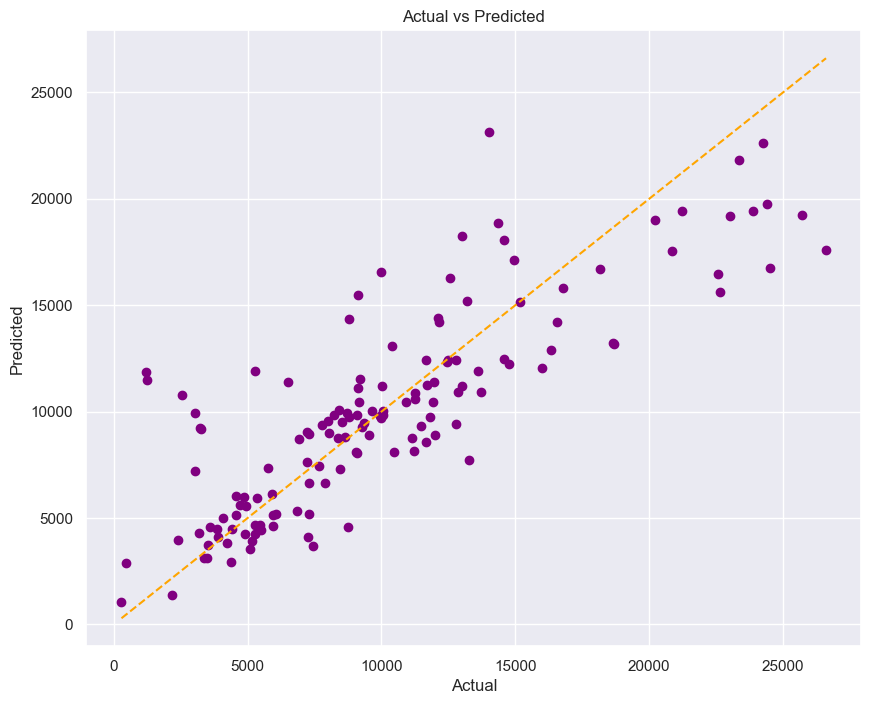

In [377]:
#plottign actual vs predicted variables

plt.figure(figsize=(10,8))

plt.scatter(y_train,y_pred,c='purple')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--',c='orange')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

/Users/martynazglinska/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


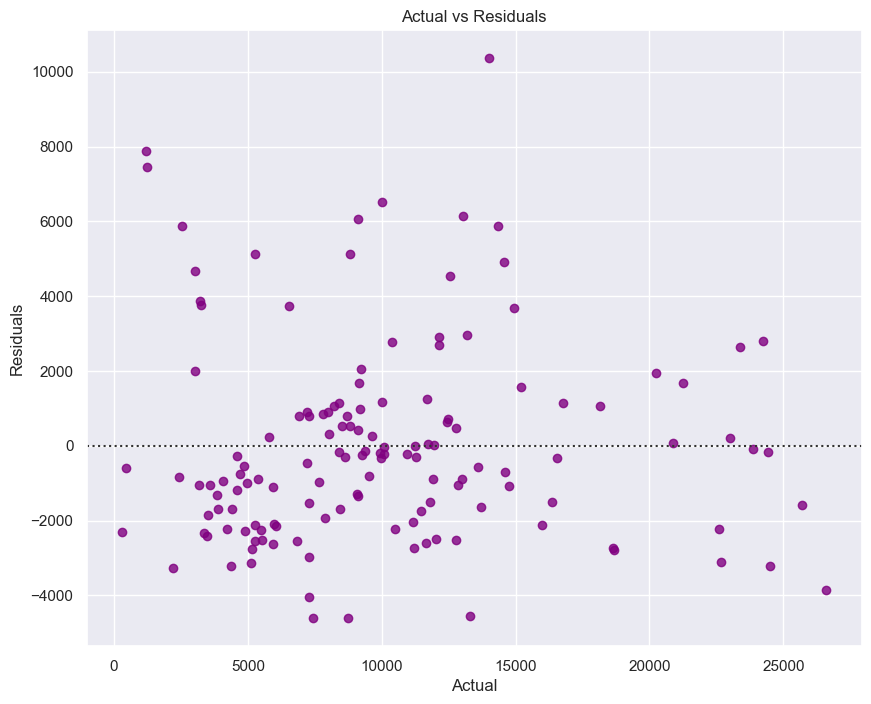

In [378]:
#Residuals
plt.figure(figsize=(10,8))

sns.residplot(y_train,y_pred,color='purple')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Actual vs Residuals')
plt.show()

#We can see there is some 

In [379]:
x_columns.columns

Index(['Marketing Spend', 'Visitors', 'Promo_num', 'Day_Name_num'], dtype='object')

In [380]:
coeff = lm.coef_
print(coeff.shape)


(4,)


In [381]:
coeff = lm.coef_
coeff.shape

coeff = coeff.reshape(-1,4)

#Creating Dataframe
#using previously created variable that has a list of all the columns we need
Coeff_df = pd.DataFrame(coeff, columns=[x_columns.columns])
Coeff_df

,Marketing Spend,Visitors,Promo_num,Day_Name_num
0,7.330444,-0.419596,2629.673749,122.675563


In [382]:
#Making the prediction
#our variables
Day = 1
Visitors = 8000
Marketing_Spend = 5000
Promo = 3

pred1 = (lm.intercept_) + (Coeff_df['Day_Name_num'].values[0] * Day) + (Coeff_df['Visitors'].values[0] * Visitors) + (Coeff_df['Marketing Spend'].values[0] * Marketing_Spend) + (Coeff_df['Promo_num'].values[0]* Promo)
pred1_round = np.round(pred1,2)
print(f'The predicted Revenue is: {pred1_round[0]}')


The predicted Revenue is: 36838.49


In [383]:
[Day,Visitors,Marketing_Spend,Promo]

[1, 8000, 5000, 3]

In [384]:
pred_1_2 = lm.predict([[Marketing_Spend,Visitors,Promo,Day]]) 
pred_1_2_round = np.round(pred_1_2,2)
print(f'The predicted Revenue is: {pred_1_2_round[0]}')

The predicted Revenue is: 36838.49


In [385]:
x_columns.columns

Index(['Marketing Spend', 'Visitors', 'Promo_num', 'Day_Name_num'], dtype='object')

In [386]:
df_friday = full_df[full_df['Day_Name'] == 'Friday'].head(1)
df_friday # Day_Name_num = 1

,Marketing Spend,Promo,Day_Name,Revenue,Visitors,Day_Name_num,Promo_num
Date,,,,,,,
2020-11-13,2614.5,No Promo,Friday,10000,2134,1,1


In [387]:
#checking corresponding numbers for Friday and Promotion red in the dataset
df_promored = full_df[full_df['Promo'] == 'Promotion Red'].head(1)
df_promored # Promo_num = 3

,Marketing Spend,Promo,Day_Name,Revenue,Visitors,Day_Name_num,Promo_num
Date,,,,,,,
2020-11-10,1298.25,Promotion Red,Tuesday,10386,1455,6,3


### Prediction 2

In [388]:
# How much revenue could we have generated, had we only run the most successful campaign? 

In [389]:
df_promored = full_df[full_df['Promo'] == 'Promotion Blue'].head(1)
df_promored # Promo_num = 2

,Marketing Spend,Promo,Day_Name,Revenue,Visitors,Day_Name_num,Promo_num
Date,,,,,,,
2020-11-11,1559.38,Promotion Blue,Wednesday,12475,1520,7,2


In [390]:
#Looking at our X value
print(X)

[[651.38 707 1 2]
 [1298.25 1455 3 6]
 [1559.38 1520 2 7]
 [1801.75 1726 1 5]
 [2614.5 2134 1 1]
 [1444.0 1316 2 3]
 [1325.44 1287 2 4]
 [1119.11 1548 1 2]
 [1092.36 1448 2 6]
 [906.7 1448 1 7]
 [1605.45 2321 1 5]
 [1687.56 1819 3 1]
 [710.27 1180 1 3]
 [2745.38 2138 3 4]
 [1695.45 1752 2 6]
 [696.75 627 2 7]
 [1572.18 2105 3 5]
 [1279.78 1671 3 1]
 [899.0 1105 3 3]
 [1330.88 1698 3 4]
 [1016.0 1541 1 2]
 [923.0 1245 1 6]
 [1425.4 1245 3 7]
 [1664.4 2171 1 5]
 [2575.88 1975 2 1]
 [776.5 1186 1 3]
 [915.91 1822 3 4]
 [961.2 1584 3 2]
 [1450.12 1961 1 6]
 [1811.11 2464 1 7]
 [1971.11 2394 1 5]
 [1267.5 1322 1 1]
 [1010.78 1167 2 3]
 [1847.65 1163 2 4]
 [1297.67 1772 3 2]
 [1086.55 1740 3 6]
 [1023.67 1317 1 7]
 [1601.64 2330 1 5]
 [2270.12 2056 2 1]
 [880.0 1191 3 3]
 [1304.11 1828 1 4]
 [1203.8 1605 2 2]
 [1024.5 1571 3 6]
 [1181.7 1288 2 7]
 [1955.0 2556 1 5]
 [2336.78 2152 2 1]
 [2557.11 2020 2 4]
 [782.82 1480 1 2]
 [779.3 1226 3 6]
 [918.0 1328 3 7]
 [2410.0 2295 1 5]
 [1948.0 2032 

In [391]:
#Our promotion is 3 place in the np.array so 2 column according to python
# we change that promotion to only take in our most successful campaign blue nr.2
z = np.copy(X)
z[:, 2] = 2
print(z)

[[651.38 707 2 2]
 [1298.25 1455 2 6]
 [1559.38 1520 2 7]
 [1801.75 1726 2 5]
 [2614.5 2134 2 1]
 [1444.0 1316 2 3]
 [1325.44 1287 2 4]
 [1119.11 1548 2 2]
 [1092.36 1448 2 6]
 [906.7 1448 2 7]
 [1605.45 2321 2 5]
 [1687.56 1819 2 1]
 [710.27 1180 2 3]
 [2745.38 2138 2 4]
 [1695.45 1752 2 6]
 [696.75 627 2 7]
 [1572.18 2105 2 5]
 [1279.78 1671 2 1]
 [899.0 1105 2 3]
 [1330.88 1698 2 4]
 [1016.0 1541 2 2]
 [923.0 1245 2 6]
 [1425.4 1245 2 7]
 [1664.4 2171 2 5]
 [2575.88 1975 2 1]
 [776.5 1186 2 3]
 [915.91 1822 2 4]
 [961.2 1584 2 2]
 [1450.12 1961 2 6]
 [1811.11 2464 2 7]
 [1971.11 2394 2 5]
 [1267.5 1322 2 1]
 [1010.78 1167 2 3]
 [1847.65 1163 2 4]
 [1297.67 1772 2 2]
 [1086.55 1740 2 6]
 [1023.67 1317 2 7]
 [1601.64 2330 2 5]
 [2270.12 2056 2 1]
 [880.0 1191 2 3]
 [1304.11 1828 2 4]
 [1203.8 1605 2 2]
 [1024.5 1571 2 6]
 [1181.7 1288 2 7]
 [1955.0 2556 2 5]
 [2336.78 2152 2 1]
 [2557.11 2020 2 4]
 [782.82 1480 2 2]
 [779.3 1226 2 6]
 [918.0 1328 2 7]
 [2410.0 2295 2 5]
 [1948.0 2032 

In [392]:
# predicting revenue if the company only run most successful promotion
pred2 = lm.predict(z)

In [393]:
total_rev_pred = round(np.sum(pred2),2)
print(f'If we only run our most successful campaign our revenue would equal:{total_rev_pred}')

If we only run our most successful campaign our revenue would equal:1827975.39


In [394]:
sum_actual_revenue = full_df['Revenue'].sum()
difference = round((total_rev_pred - sum_actual_revenue),2)

In [395]:
print(f'If the company run the most successful campaign overall they would earn {difference} more')

If the company run the most successful campaign overall they would earn 48793.39 more


### Decision Tree Regressor Check

In [396]:
# Fitting decision Tree on our training dataset
regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [397]:
y_preddt = regressor.predict(X_train)
np.set_printoptions(precision=2)


In [398]:
#checking the accuracy of the model
print('Model Accuracy on the training dataset is:', regressor.score(X_train,y_train))
print('Model Accuracy r2 on the training dataset prediction is:', r2_score(y_train,y_preddt))

# Model Accuracy on the testing Dataset
print('The Accuracy on the testing dataset:', regressor.score(X_test,y_test))

#Root Mean Squared Error (RMSE)
print('RMSE:', sqrt(mean_squared_error(y_train,y_preddt)))

#MAE
print('MAE train dataset:', mean_absolute_error(y_train,y_preddt))
print('MAE test dataset:', mean_absolute_error(y_test,regressor.predict(X_test)))

# The Decision Tree Regressor is much more accurate than the Linear Regression
# We will use the DT to predict the revenue in situation 1 and 2

Model Accuracy on the training dataset is: 1.0
Model Accuracy r2 on the training dataset prediction is: 1.0
The Accuracy on the testing dataset: 0.73041139800796
RMSE: 0.0
MAE train dataset: 0.0
MAE test dataset: 1826.5428571428572


/var/folders/b8/q7n9jnts6_zd6bqvwc5lm25m0000gn/T/ipykernel_18234/457518102.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--',c='orange')


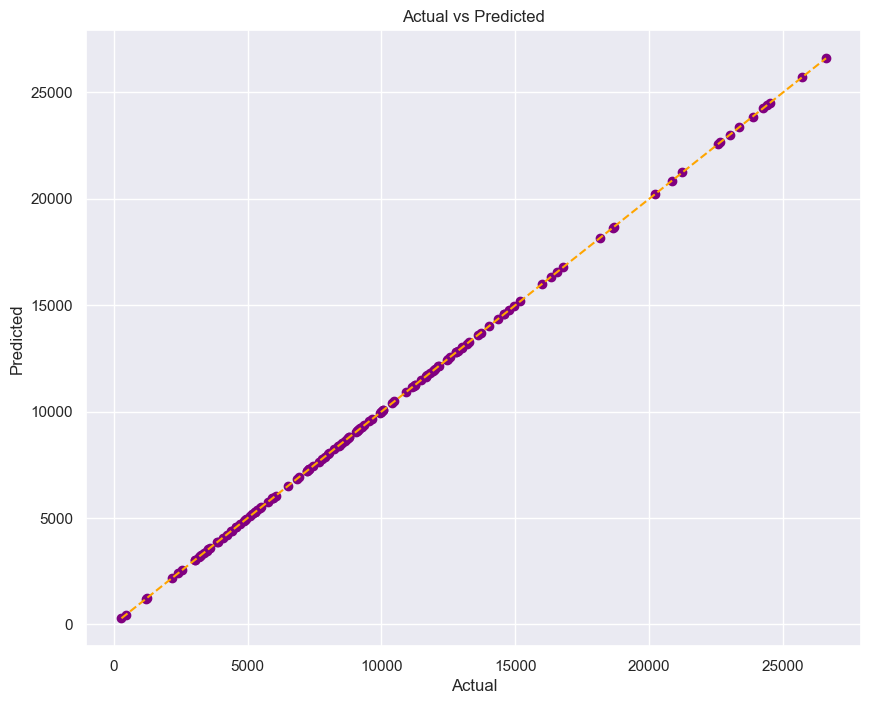

In [399]:
plt.figure(figsize=(10,8))

plt.scatter(y_train,y_preddt,c='purple')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--',c='orange')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

/Users/martynazglinska/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


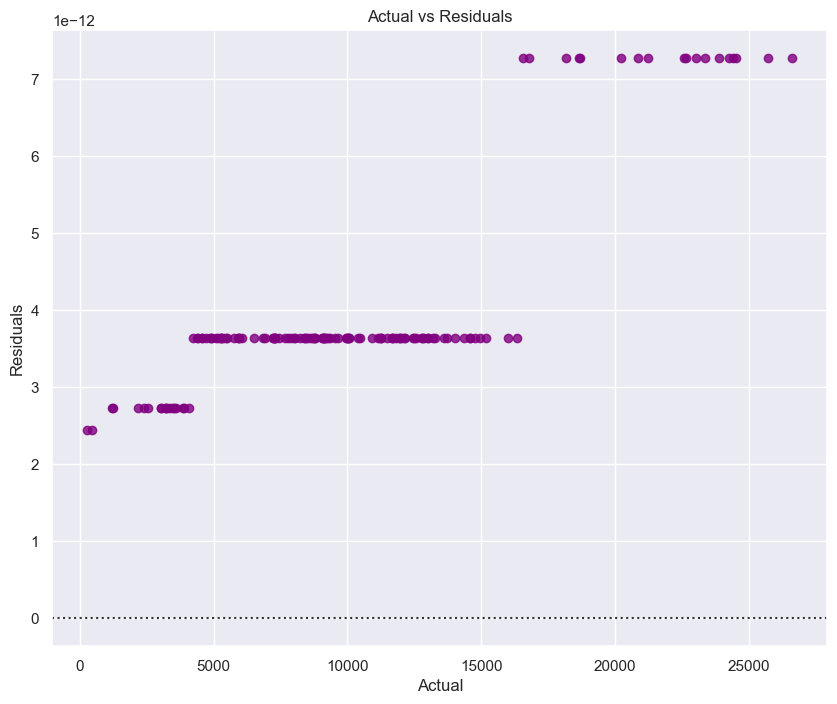

In [400]:
#Residuals
plt.figure(figsize=(10,8))

sns.residplot(y_train,y_preddt,color='purple')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Actual vs Residuals')
plt.show()



In [401]:
feature_importances

array([0.51, 0.14, 0.33, 0.01])

In [402]:
features_names = x_columns.columns
features_names

Index(['Marketing Spend', 'Visitors', 'Promo_num', 'Day_Name_num'], dtype='object')

In [403]:
df_dt = pd.DataFrame(feature_importances.reshape(-1,4),columns=[x_columns.columns])

In [404]:
#PREDICTION 1
#Making the prediction
#our variables
Day = 1
Visitors = 8000
Marketing_Spend = 5000
Promo = 3

pred1_dt = regressor.predict([[Marketing_Spend,Visitors,Promo,Day]])
pred1_dt_round = np.round(pred1_dt,2)
print(f'The predicted Revenue is {pred1_dt_round[0]}')

The predicted Revenue is 14012.0


In [405]:
# PREDICTION 2
# we will use the same variable z as last prediction using linear regression
pred2_dt = regressor.predict(z)

In [406]:
total_rev_pred_dt = round(np.sum(pred2_dt),2)
print(f'If we only run our most successful campaign our revenue would equal:{total_rev_pred_dt}')

If we only run our most successful campaign our revenue would equal:2236468.0


In [407]:
sum_actual_revenue = full_df['Revenue'].sum()
difference_dt = round((total_rev_pred_dt - sum_actual_revenue),2)

In [408]:
print(f'If the company run the most successful campaign overall they would earn {difference_dt} more')

If the company run the most successful campaign overall they would earn 457286.0 more
